# Risk factors cervical cancer
This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.

In [1]:
# Import libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
import seaborn as sns
import statsmodels.api as sm
import graphviz
from xgboost import XGBClassifier

In [2]:
# Import file
df= pd.read_csv('../Untitled Folder/DATAs projets/kag_risk_factors_cervical_cancer.csv')

# Observations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

In [4]:
# df.nunique()
# df.isna().sum()
# df.mode()
# (df=='?').sum()
# (df=='?').sum().index
## '?' is the missing value 

In [5]:
# All STDs types are booleans, and I have 105 rows with '?' for each of them. I can't choose between 1 or 0 I prefer drop the 105 rows.   
# df= df[df['STDs:HPV'] != '?']

In [6]:
# Now I have 858 rows and 36 columns, I still have some '?'.
# Most of object columns are booleans
# To understand all the columns I must understand all the vocabulary and see links between all of them
# I'm french so I translated the signification

# Vocabulary (EN to FR): 
- IUD = Stérilet
- STDs : Sexually Transmitted Diseases = Maladies Sexuellement Transmissibles
- Condylomatosis: famille des papillomavirus et entrainant la formation de verrues
- Syphilis :infection sexuellement transmissible contagieuse, due à la bactérie tréponème pâle
- pelvic inflammatory disease : La maladie inflammatoire pelvienne, également appelée trouble inflammatoire pelvien (PID), est une infection de la partie supérieure du système reproducteur féminin, à savoir l'utérus, les trompes de Fallope et les ovaires, ainsi que de l'intérieur du pelvis. ... La maladie est causée par une bactérie qui se propage à partir du vagin et du col utérin
- molluscum contagiosum :même famille que la variole
- HPV: est l'une des infections sexuellement transmissibles les plus répandues, chez les femmes mais aussi les hommes : environ 70 à 80% de la population sexuellement active sera en contact avec ce virus au cours de sa vie sexuelle
- CIN : Cervical Intraepithelial Neoplasia -  est la croissance anormale de cellules à la surface du col de l’ utérus qui pourrait potentiellement conduire au cancer du col utérin . [1] Plus spécifiquement, CIN fait référence à la transformation potentiellement pré -cancéreuse des cellules du col utérin
- Hinselmann est le créateur de la Colposcopy 
- Schiller est un test permettant la mise en évidence de dysplasies (modifications précancéreuses) du col de l'utérus à l'aide d'un badigeon de lugol
- Citology: Il s'agit de l'étude des cellules(isolées) normales ou pathologiques (cytopathologie), ainsi que de leurs aspect morphologique ou biochimique.
- Biopsy : est le prélèvement d'une très petite partie d'un organe ou d'un tissu pour effectuer des examens concernant un être vivant

In [7]:
#After my firts observation by columns, I need to clean them. 


In [8]:
# df.columns

In [9]:
# df['Citology'].value_counts()
# .value_counts(), mean() and mode() 

In [10]:
df2=df.copy()
# df2.info()

# Cleaning

In [11]:
df2['Number of sexual partners'][df2['Number of sexual partners']=='?']='2.0'
df2['First sexual intercourse'][df2['First sexual intercourse']=='?']='15'
df2['Num of pregnancies'][df2['Num of pregnancies']=='?']='0.0'
df2['Smokes'][df2['Smokes']=='?']='0'
df2['Smokes (years)'][df2['Smokes (years)']=='?']='0'
df2['Smokes (packs/year)'][df2['Smokes (packs/year)']=='?']='0'
df2['Hormonal Contraceptives'][df2['Hormonal Contraceptives']=='?']='1.0'
df2['Hormonal Contraceptives (years)'][df2['Hormonal Contraceptives (years)']=='?']='-1'
df2['IUD'][df2['IUD']=='?']='1.0'
df2['IUD (years)'][df2['IUD (years)']=='?']='-1'

C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

For Hormonal Contraceptives and IUD, I checked some articles about contraception in Venezuela.
- 2010 - 75% of women (15 to 49 years old) used contraceptions
- When you take Hormonal Contraceptives you don't take IUD in the same time, generally after Hormonal Contraceptive you change for IUD
- in 2010 you had a IUD after your first pregency, now you can have it before 

In [12]:
df2['STDs'][df2['STDs']=='?']='-1'
df2['STDs (number)'][df2['STDs (number)']=='?']='-1'
df2['STDs:condylomatosis'][df2['STDs:condylomatosis']=='?']='-1'
df2['STDs:cervical condylomatosis'][df2['STDs:cervical condylomatosis']=='?']='-1'
df2['STDs:vaginal condylomatosis'][df2['STDs:vaginal condylomatosis']=='?']='-1'
df2['STDs:vulvo-perineal condylomatosis'][df2['STDs:vulvo-perineal condylomatosis']=='?']='-1'
df2['STDs:syphilis'][df2['STDs:syphilis']=='?']='-1'
df2['STDs:pelvic inflammatory disease'][df2['STDs:pelvic inflammatory disease']=='?']='-1'
df2['STDs:genital herpes'][df2['STDs:genital herpes']=='?']='-1'
df2['STDs:molluscum contagiosum'][df2['STDs:molluscum contagiosum']=='?']='-1'
df2['STDs:AIDS'][df2['STDs:AIDS']=='?']='-1'
df2['STDs:HIV'][df2['STDs:HIV']=='?']='-1'
df2['STDs:Hepatitis B'][df2['STDs:Hepatitis B']=='?']='-1' 
df2['STDs:HPV'][df2['STDs:HPV']=='?']='-1' 
df2['STDs: Time since first diagnosis'][df2['STDs: Time since first diagnosis']=='?']='0'
df2['STDs: Time since last diagnosis'][df2['STDs: Time since last diagnosis']=='?']='0'

C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\leila\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [13]:
# '?' doesn't exist anymore

# Standardization of my Dataframe 

In [14]:
df3=df2.astype(float).round(1)

# Standardization of all the columns titles 

In [15]:
df3.columns = df3.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '_').str.replace(',', '_').str.replace(':', '_')

In [16]:
df3.info()
# df3.columns
# (df3=='?').sum()
# print(df3)
# last observation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
AGE                                   858 non-null float64
NUMBER_OF_SEXUAL_PARTNERS             858 non-null float64
FIRST_SEXUAL_INTERCOURSE              858 non-null float64
NUM_OF_PREGNANCIES                    858 non-null float64
SMOKES                                858 non-null float64
SMOKES_YEARS                          858 non-null float64
SMOKES_PACKS/YEAR                     858 non-null float64
HORMONAL_CONTRACEPTIVES               858 non-null float64
HORMONAL_CONTRACEPTIVES_YEARS         858 non-null float64
IUD                                   858 non-null float64
IUD_YEARS                             858 non-null float64
STDS                                  858 non-null float64
STDS_NUMBER                           858 non-null float64
STDS_CONDYLOMATOSIS                   858 non-null float64
STDS_CERVICAL_CONDYLOMATOSIS          858 non-null float64
STDS_VAGIN

# Now my df3 is clean and normalize 
I can begin to do some viz


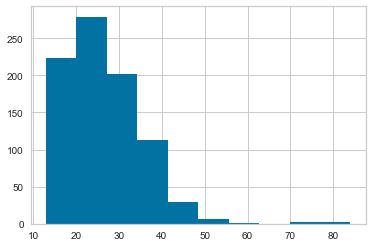

In [17]:
df3.AGE.hist()

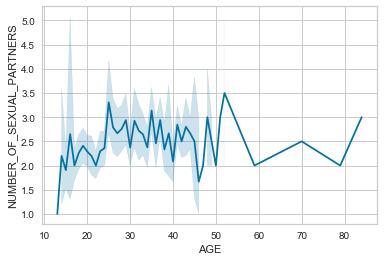

In [18]:
sns.lineplot(x='AGE',y='NUMBER_OF_SEXUAL_PARTNERS',data=df3)

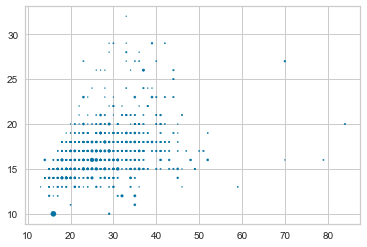

In [19]:
plt.scatter(x='AGE', y='FIRST_SEXUAL_INTERCOURSE', s='NUMBER_OF_SEXUAL_PARTNERS', data=df3)
plt.show()

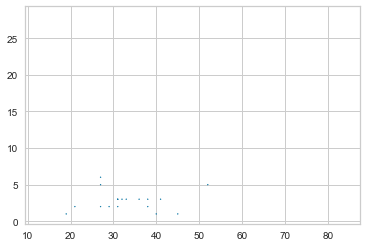

In [20]:
plt.scatter(x='AGE', y='NUMBER_OF_SEXUAL_PARTNERS', s='DX_CANCER', data=df3)
plt.show()

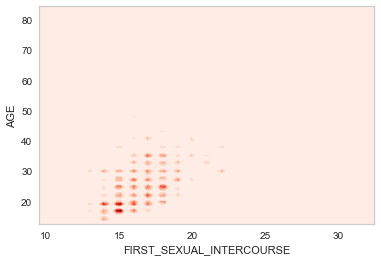

In [21]:
sns.kdeplot(df3.FIRST_SEXUAL_INTERCOURSE, df3.AGE, cmap="Reds", shade=True, bw=.15)

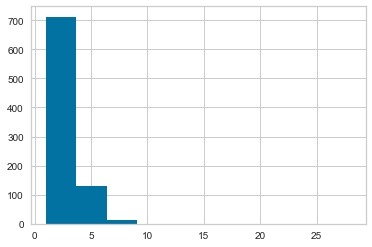

In [22]:
df3.NUMBER_OF_SEXUAL_PARTNERS.hist()

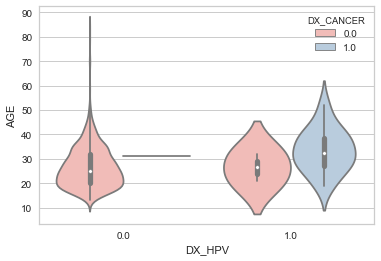

In [23]:
sns.violinplot(x='DX_HPV',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")

In [24]:
# df3.columns

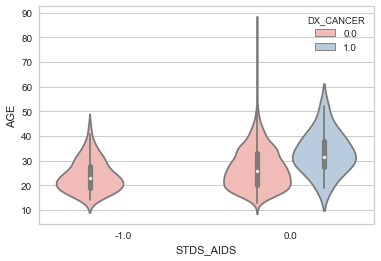

In [25]:
# sns.violinplot(x='STDS_HIV',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")
sns.violinplot(x='STDS_AIDS',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")


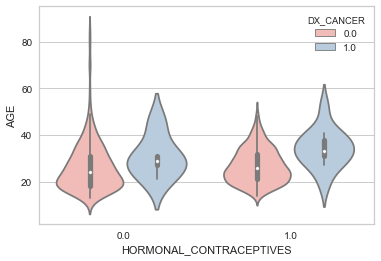

In [26]:
sns.violinplot(x='HORMONAL_CONTRACEPTIVES',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")

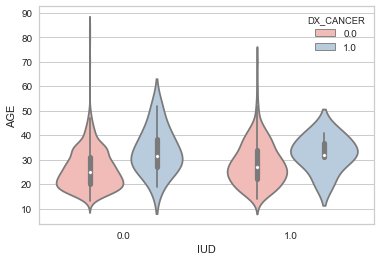

In [27]:
sns.violinplot(x='IUD',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")

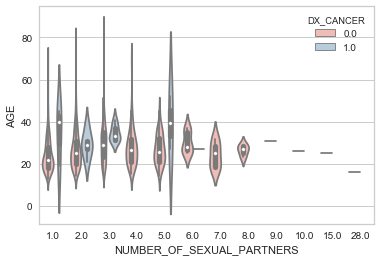

In [28]:
sns.violinplot(x='NUMBER_OF_SEXUAL_PARTNERS',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")

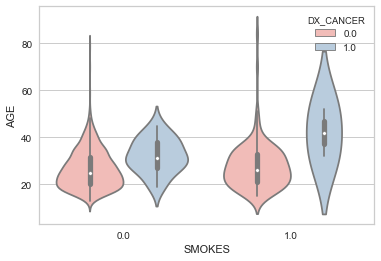

In [29]:
sns.violinplot(x='SMOKES',y='AGE',hue='DX_CANCER' ,data=df3,palette="Pastel1")

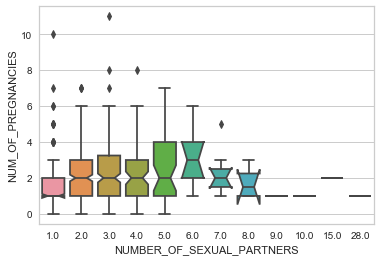

In [30]:
sns.boxplot( x=df3['NUMBER_OF_SEXUAL_PARTNERS'], y=df3['NUM_OF_PREGNANCIES'], notch=True)

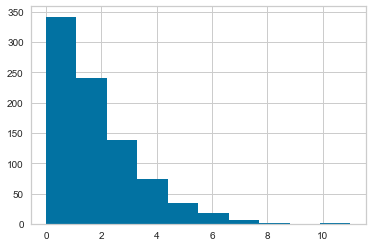

In [31]:
df3.NUM_OF_PREGNANCIES.hist()

In [32]:
df3_corr=df3.corr()

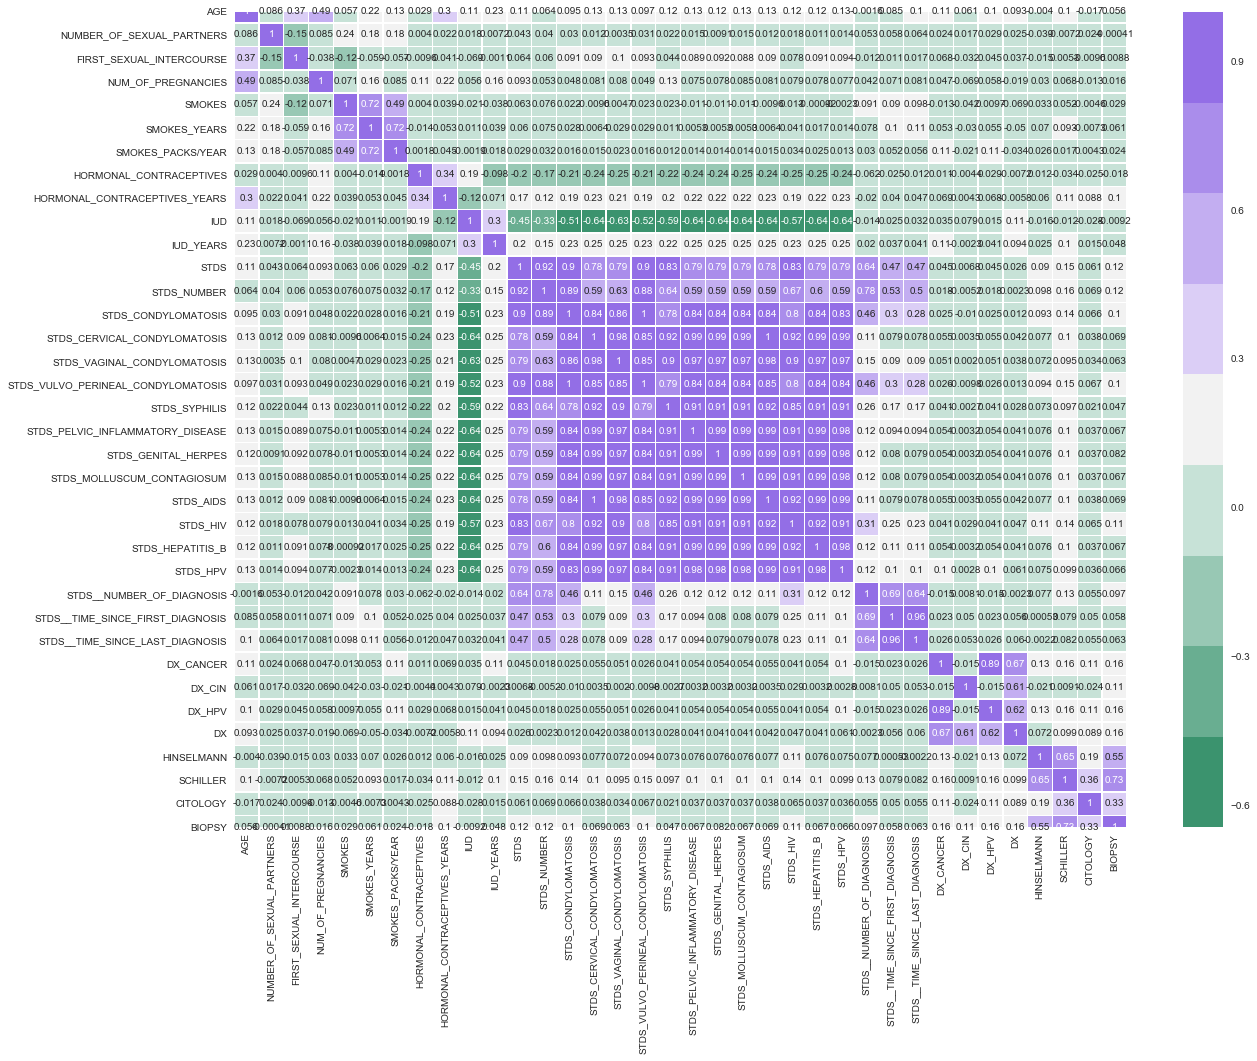

In [33]:
plt.figure(figsize=(20, 15))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(df3_corr, annot=True,linewidths=.5, cmap=cmap)
# There is too much correlation for all type of stds, it's logic.

In [34]:
# During my experimentation I managed to get_dummies but my results were the same. So I didn't apply it. 

In [35]:
# df3=pd.get_dummies(data=df3, columns=['SMOKES','HORMONAL_CONTRACEPTIVES','IUD','STDS','DX_CANCER','STDS_CONDYLOMATOSIS',
#        'STDS_CERVICAL_CONDYLOMATOSIS', 'STDS_VAGINAL_CONDYLOMATOSIS',
#        'STDS_VULVO_PERINEAL_CONDYLOMATOSIS', 'STDS_SYPHILIS',
#        'STDS_PELVIC_INFLAMMATORY_DISEASE', 'STDS_GENITAL_HERPES',
#        'STDS_MOLLUSCUM_CONTAGIOSUM', 'STDS_AIDS', 'STDS_HIV',
#        'STDS_HEPATITIS_B', 'STDS_HPV', 'STDS__NUMBER_OF_DIAGNOSIS', 'DX_CIN', 'DX_HPV', 'DX',
#         'HINSELMANN', 'SCHILLER','CITOLOGY', 'BIOPSY'], drop_first=True)

# Low variance

In [36]:
low_variance=[]
for col in df3._get_numeric_data():
    minimum=min(df3[col])
    ninety_perc=np.percentile(df3[col],90)
    if ninety_perc==minimum:
        low_variance.append(col)
print(low_variance)

['STDS__NUMBER_OF_DIAGNOSIS', 'STDS__TIME_SINCE_FIRST_DIAGNOSIS', 'STDS__TIME_SINCE_LAST_DIAGNOSIS', 'DX_CANCER', 'DX_CIN', 'DX_HPV', 'DX', 'HINSELMANN', 'SCHILLER', 'CITOLOGY', 'BIOPSY']


In [37]:
df3[col].value_counts()

0.0    803
1.0     55
Name: BIOPSY, dtype: int64

In [38]:
# we drop our low variance 
# df3.drop(low_variance, axis=1)

In [39]:
stats= df3.describe().T
stats['IQR']= stats['75%']- stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
AGE,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0,12.0
NUMBER_OF_SEXUAL_PARTNERS,858.0,2.511655,1.644759,1.0,2.0,2.0,3.0,28.0,1.0
FIRST_SEXUAL_INTERCOURSE,858.0,16.979021,2.797653,10.0,15.0,17.0,18.0,32.0,3.0
NUM_OF_PREGNANCIES,858.0,2.127040,1.508108,0.0,1.0,2.0,3.0,11.0,2.0
SMOKES,858.0,0.143357,0.350641,0.0,0.0,0.0,0.0,1.0,0.0
SMOKES_YEARS,858.0,1.201865,4.060622,0.0,0.0,0.0,0.0,37.0,0.0
SMOKES_PACKS/YEAR,858.0,0.445921,2.210448,0.0,0.0,0.0,0.0,37.0,0.0
HORMONAL_CONTRACEPTIVES,858.0,0.686480,0.464194,0.0,0.0,1.0,1.0,1.0,1.0
HORMONAL_CONTRACEPTIVES_YEARS,858.0,1.845921,3.681673,-1.0,0.0,0.2,2.0,30.0,2.0
IUD,858.0,0.233100,0.423052,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
outliers = pd.DataFrame(columns=df3.columns)

In [41]:
outliers

,AGE,NUMBER_OF_SEXUAL_PARTNERS,FIRST_SEXUAL_INTERCOURSE,NUM_OF_PREGNANCIES,SMOKES,SMOKES_YEARS,SMOKES_PACKS/YEAR,HORMONAL_CONTRACEPTIVES,HORMONAL_CONTRACEPTIVES_YEARS,IUD,...,STDS__TIME_SINCE_FIRST_DIAGNOSIS,STDS__TIME_SINCE_LAST_DIAGNOSIS,DX_CANCER,DX_CIN,DX_HPV,DX,HINSELMANN,SCHILLER,CITOLOGY,BIOPSY


In [42]:
for columns in stats.index: 
    iqr=stats.at[col,'IQR']
    cutoff=iqr*1.6
    lower= stats.at[col,'25%']-cutoff
    higher= stats.at[col,'75%']+cutoff
    results=df3[(df3[col]<lower)|(df3[col]>higher)].copy()
    results['Outlier']=col
    outliers=outliers.append(results)

C:\Users\leila\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [43]:
outliers.head()

,AGE,BIOPSY,CITOLOGY,DX,DX_CANCER,DX_CIN,DX_HPV,FIRST_SEXUAL_INTERCOURSE,HINSELMANN,HORMONAL_CONTRACEPTIVES,...,STDS_HPV,STDS_MOLLUSCUM_CONTAGIOSUM,STDS_NUMBER,STDS_PELVIC_INFLAMMATORY_DISEASE,STDS_SYPHILIS,STDS_VAGINAL_CONDYLOMATOSIS,STDS_VULVO_PERINEAL_CONDYLOMATOSIS,STDS__NUMBER_OF_DIAGNOSIS,STDS__TIME_SINCE_FIRST_DIAGNOSIS,STDS__TIME_SINCE_LAST_DIAGNOSIS
6,51.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,40.0,1.0,1.0,0.0,0.0,0.0,0.0,18.0,0.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
23,40.0,1.0,0.0,0.0,1.0,0.0,1.0,20.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,37.0,1.0,0.0,1.0,0.0,1.0,0.0,18.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0,15.0
44,37.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# df3=df3.drop(outliers.index)
# My results with or without my outliers are the same 

In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
AGE                                   858 non-null float64
NUMBER_OF_SEXUAL_PARTNERS             858 non-null float64
FIRST_SEXUAL_INTERCOURSE              858 non-null float64
NUM_OF_PREGNANCIES                    858 non-null float64
SMOKES                                858 non-null float64
SMOKES_YEARS                          858 non-null float64
SMOKES_PACKS/YEAR                     858 non-null float64
HORMONAL_CONTRACEPTIVES               858 non-null float64
HORMONAL_CONTRACEPTIVES_YEARS         858 non-null float64
IUD                                   858 non-null float64
IUD_YEARS                             858 non-null float64
STDS                                  858 non-null float64
STDS_NUMBER                           858 non-null float64
STDS_CONDYLOMATOSIS                   858 non-null float64
STDS_CERVICAL_CONDYLOMATOSIS          858 non-null float64
STDS_VAGIN

In [46]:
df3.corr().DX[abs(df3.corr().DX)>0.4].sort_values()

DX_CIN       0.606939
DX_HPV       0.616327
DX_CANCER    0.665647
DX           1.000000
Name: DX, dtype: float64

In [47]:
# # My df doesn't have the same weight and balance so I decide to reequilibrate it
dfCancer=df3.loc[df3.DX_CANCER== 1.00]
df_sample=dfCancer.sample(n=700,random_state=1,replace=True)
df_new=df3.append(df_sample)

In [48]:
# df_new.describe()
# df_new.DX_CANCER.value_counts()
y1_new=df_new.DX_CANCER
X1_new=df_new.drop(['DX_CANCER','DX'], axis=1)

In [49]:
#decision tree

In [50]:
X=X1_new
y=y1_new
# y=df3.DX_CANCER
# X=df3.drop(['DX_CANCER','DX'], axis=1)

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [52]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

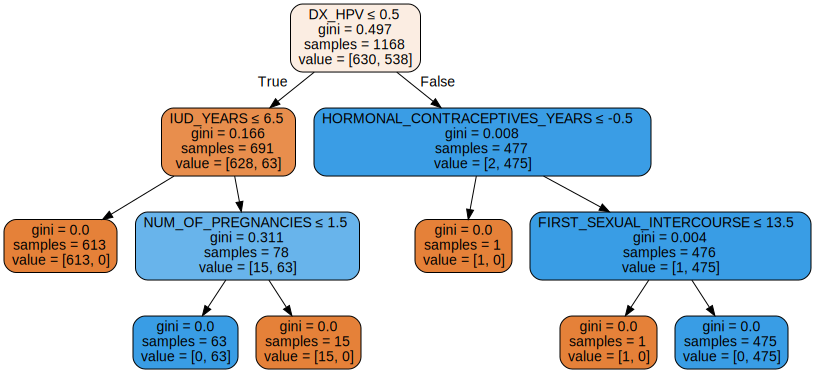

In [53]:
graph = export_graphviz(dtree, filled=True, rounded=True,
                        feature_names=X.columns,
                        special_characters=True)
graphviz.Source(graph)
# Our Decision Tree show the factor to have a Cervical Cancer.
# When you are diagnostic for HPV 

In [54]:
# Evaluation du modèle sur un le fichier de test
pred = dtree.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", format(accuracy))

Accuracy:  1.0


In [56]:
metrics.confusion_matrix(y_test,pred)

array([[210,   0],
       [  0, 180]], dtype=int64)

In [57]:
# Random Forest

In [58]:
rforest = RandomForestClassifier()

In [59]:
# Appliquer le classifieur "forêt aléatoire" sur le jeu d'entrainment
rforest.fit(X_train, y_train)

C:\Users\leila\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
# Prédire les classes sur le fichier de test
pred2 = rforest.predict(X_test)

In [61]:
metrics.confusion_matrix(y_test,pred2)

array([[210,   0],
       [  0, 180]], dtype=int64)

In [62]:
# Evaluer le modèle 
accuracy = accuracy_score(y_test, pred2)
print("Accuracy: ", format(accuracy))

Accuracy:  1.0


In [63]:
model3=XGBClassifier().fit(X_train,y_train)
y_pred3=model3.predict(X_test)
metrics.confusion_matrix(y_test,y_pred3)

array([[210,   0],
       [  0, 180]], dtype=int64)

In [64]:
model4=KNeighborsClassifier().fit(X_train,y_train)
y_pred4=model4.predict(X_test)
metrics.confusion_matrix(y_test,y_pred4)

array([[196,  14],
       [  0, 180]], dtype=int64)

In [65]:
model5=GaussianNB().fit(X_train,y_train)
y_pred5=model5.predict(X_test)
metrics.confusion_matrix(y_test,y_pred5)

array([[ 46, 164],
       [  0, 180]], dtype=int64)

In [66]:
X.shape

(1558, 34)

In [67]:
model_list=[KNeighborsClassifier() ,GaussianNB() ,RandomForestClassifier() ,LogisticRegression() ,DecisionTreeClassifier(),XGBClassifier()]

for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') the accuracy is: 0.9641025641025641
confusion matrix for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is  [[196  14]
 [  0 180]]
0.9666666666666667
for GaussianNB(priors=None, var_smoothing=1e-09) the accuracy is: 0.5794871794871795
confusion matrix for GaussianNB(priors=None, var_smoothing=1e-09) is  [[ 46 164]
 [  0 180]]
0.6095238095238096
for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                      

C:\Users\leila\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\leila\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) the accuracy is: 1.0
confusion matrix for XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is  [[210   0]

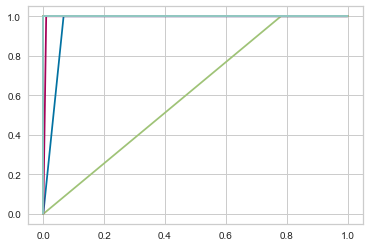

In [68]:
l_acc=[]
l_cm=[]
for model_bis in model_list:
    model2_bis=model_bis.fit(X_train,y_train)
    y_pred_2_bis=model2_bis.predict(X_test)
    l_acc.append(metrics.accuracy_score(y_test,y_pred_2_bis))
    l_cm.append(metrics.confusion_matrix(y_test,y_pred_2_bis))
    print(f'for {model_bis} the accuracy is: {metrics.accuracy_score(y_test,y_pred_2_bis)}')
    print(f'confusion matrix for {model_bis} is ',metrics.confusion_matrix(y_test,y_pred_2_bis))
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_2_bis)
    auc=metrics.roc_auc_score(y_test,y_pred_2_bis)
    plt.plot(fpr,tpr)
    print(auc)
    

In [69]:
pd.DataFrame([model_list, l_acc]).T.sort_values(by=1)

,0,1
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.579487
0,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.964103
3,"LogisticRegression(C=1.0, class_weight=None, d...",0.994872
2,"(DecisionTreeClassifier(class_weight=None, cri...",1
4,"DecisionTreeClassifier(class_weight=None, crit...",1
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",1


In [70]:
# With or whitout Dummies, with our without outliers, with our without low variance my models have the same results and with or whitout class imbalance problem. 
# I think I don't have enought data, My results are too goods execpt for GAUSSIANNB.   

In [71]:
###### PCA 
# I did PCA for practice it. 

In [72]:
pca= PCA(3)
# I choose only 3 PCA, as we saw in the decision tree only 2 factors are the reason of DX_CANCER plus and I Had one more, without name

In [73]:
pca.fit(df3)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
# pca.components_
# http://cedric.cnam.fr/vertigo/Cours/ml/tpAcp.html

In [75]:
pca.explained_variance_ratio_[:3]

array([0.55884722, 0.13762228, 0.08981058])

In [76]:
pca.explained_variance_ratio_[:3].sum()

0.7862800850040844

In [77]:
pca_df=pd.DataFrame(pca.transform(df3), columns=['PCA1', 'PCA2','PCA3'])

In [78]:
# pca_df.head(3)

In [79]:
from sklearn.cluster import KMeans

In [80]:
Kmeans=KMeans(2)
#I want only 2 clusters, because I want to know if yes or no I can have a cervical cancer

In [81]:
# ?KMeans

In [82]:
df_clusters=Kmeans.fit(pca_df)

In [83]:
df_clusters.cluster_centers_

array([[-5.38431701,  0.02237639, -0.07317918],
       [ 9.05238297, -0.03762031,  0.1230325 ]])

In [84]:
df3['clusters']=df_clusters.fit_predict(pca_df)

In [85]:
df3.clusters.value_counts()

1    538
0    320
Name: clusters, dtype: int64

In [86]:
df3.reset_index(inplace=True)

In [87]:
pd.crosstab(df3.DX_CANCER, df3.clusters)

clusters,0,1
DX_CANCER,,
0.0,307,533
1.0,13,5


In [88]:
pd.crosstab(df3.STDS_HPV, df3.clusters)
# We find our 105 '-1'

clusters,0,1
STDS_HPV,,
-1.0,22,83
0.0,296,455
1.0,2,0


In [89]:
pd.crosstab(df3.SMOKES, df3.clusters)

clusters,0,1
SMOKES,,
0.0,262,473
1.0,58,65


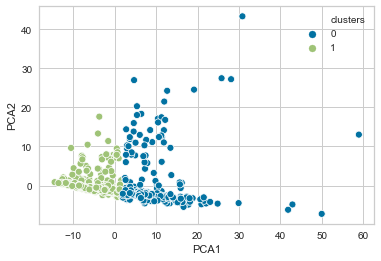

In [90]:
plt.rcParams['axes.facecolor'] = 'White'
sns.scatterplot(x='PCA1',y='PCA2', data=pca_df, hue=df3.clusters)

In [91]:
# sns.scatterplot(x='PCA1',y='PCA3', data=pca_df, hue=df_new.clusters)

In [92]:
# sns.scatterplot(x='PCA2',y='PCA1', data=pca_df, hue=df_new.clusters)

In [93]:
# sns.scatterplot(x='PCA2',y='PCA3', data=pca_df, hue=df_new.clusters)

In [94]:
# sns.scatterplot(x='PCA3',y='PCA1', data=pca_df, hue=df_new.clusters)

In [95]:
# sns.scatterplot(x='PCA3',y='PCA2', data=pca_df, hue=df_new.clusters)

In [96]:
n_samples=1000
X,y=datasets.make_blobs(n_samples=n_samples)
# possible avec blobs au lieu de moon , et changer le noise 
X=StandardScaler().fit_transform(X)
#blobs better view 

In [97]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans=cluster.KMeans(n_clusters=2)

In [98]:
single.fit(X);
kmeans.fit(X);

In [99]:
y1_pred=single.labels_.astype(np.int)
y2_pred=kmeans.predict(X)

Model 1 Silhouette Score: 0.6301894438002396
Model 2 Silhouette Score: 0.6240306996375788
Model 1 Silhouette Score: 0.46475871096948906
Model 2 Silhouette Score: 0.4786773743247899


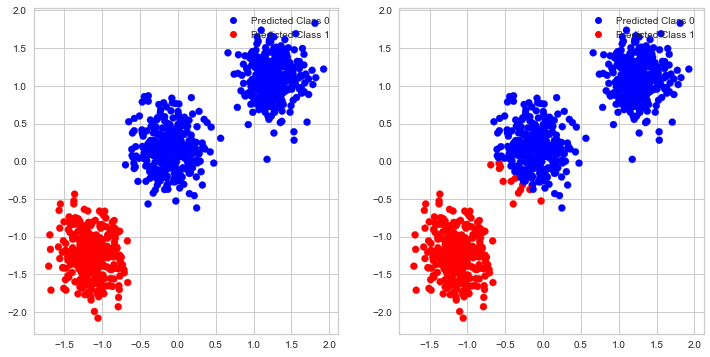

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
legend_elems = [Line2D([0], [0], color=color, marker='o', linestyle='', label="Predicted Class {}".format(i))
                for i, color in enumerate(colors)]
ax[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')
print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))
print("Model 1 Silhouette Score: {}".format(davies_bouldin_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(davies_bouldin_score(X, y2_pred)))

In [101]:
# davies_bouldin_score and silhouette_score have good scores

In [102]:
model=KMeans()

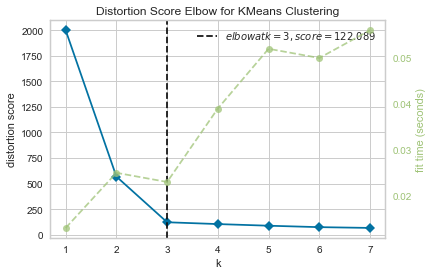

In [103]:
vizualiser=KElbowVisualizer(model,k=(1,8))
vizualiser.fit(X)
vizualiser.poof()
# My distortion Score Elbow for Kmeans Clustering show us 
# the optimal number of clusters is (most of the time) 2, and sometimes it's 3.
# So I kept 2 for the number of clusters

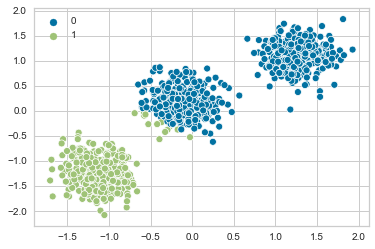

In [104]:
sns.scatterplot(X[:,0], X[:,1], hue=y2_pred)

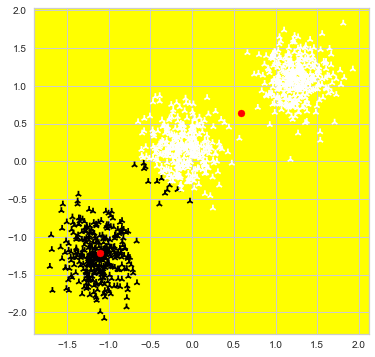

In [105]:
plt.rcParams['axes.facecolor'] = 'Yellow'
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y2_pred, marker='2')

centers= kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='red')

In [106]:
# ?make_blobs

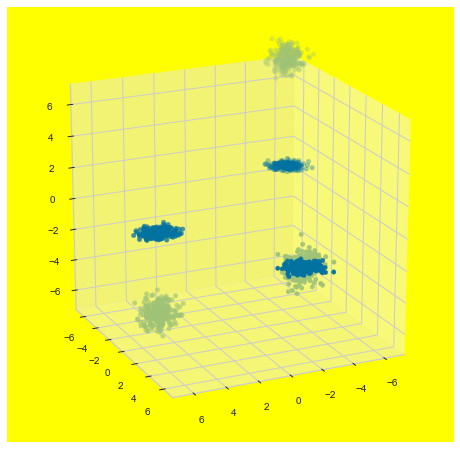

In [107]:
X, _ = make_blobs(n_samples=800, n_features=2, cluster_std=0.5)
X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]
rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)
ax.view_init(elev=20, azim=65)
plt.show()



In [108]:
pca=PCA(3)
pca.fit(X)
pca_X=pca.transform(X)

In [109]:
pca_X

array([[12.28307634,  0.6299495 , -0.5053157 ],
       [-5.65467778, -5.72033718, -0.22072482],
       [12.19601731, -0.01840545, -0.92899455],
       ...,
       [-6.95560783,  5.74210917, -0.55854827],
       [-6.19039732,  6.07309634, -0.12322888],
       [-4.91800478, -4.51824038, -0.02741557]])

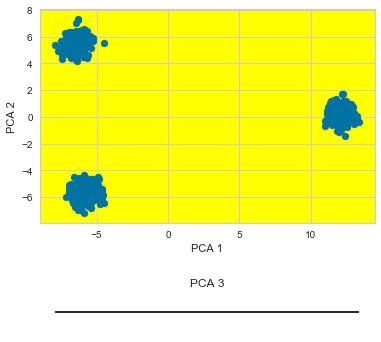

In [110]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]
ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")
ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')
plt.show()

In [111]:
# ?TSNE

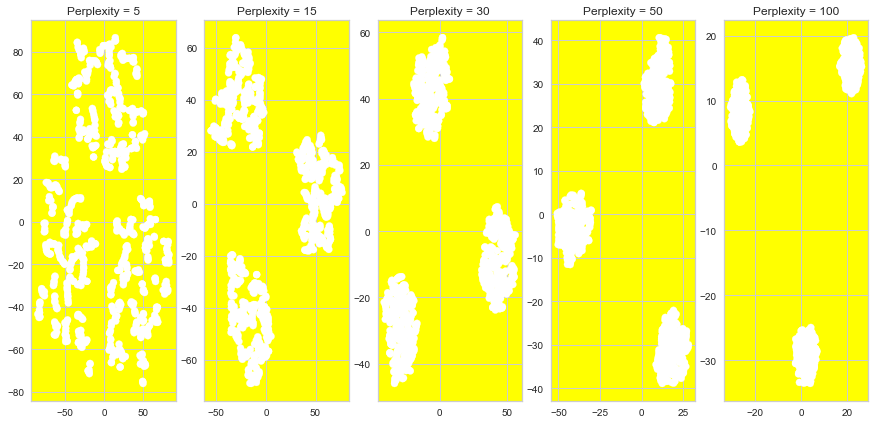

In [112]:
# I don't have a lot of data in my df so I apply TSNE perplexity
# As we can see I have 3 distincts groups 

fig, ax = plt.subplots(1, 5, figsize=(15, 7))
for i, perp in enumerate([5, 15,30, 50, 100]):
    x_embedded = TSNE(perplexity=perp,method='exact').fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
plt.show()

# SOURCES
- https://donnees.banquemondiale.org/indicator/SP.DYN.CONU.ZS?end=2018&start=1961
- https://www.franceinter.fr/emissions/les-histoires-du-monde/les-histoires-du-monde-29-novembre-2017
- https://www.causette.fr/le-mag/lire-article/article-2186/venezuela-crise-contraceptive.html
- https://www.franceculture.fr/politique/comprendre-la-crise-au-venezuela-en-dix-dates
- wikipedia 
- -> Documentation
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/